In [1]:
#template for data analysis using the CSV files we created

In [2]:
#import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [6]:
#Read in total energy csv file and create data frame
total_energy_df = pd.DataFrame(pd.read_csv('CSV/total_renewable_energy.csv'))
#Read in price and create data frame
price_df = pd.DataFrame(pd.read_csv('CSV/energyprices.csv'))

#Read in coal generated csv file and create data frame
coal_gen = pd.DataFrame(pd.read_csv('CSV/Coal_Generated.csv'))

#Read in coal generated csv file and create data frame
nat_gas_gen = pd.DataFrame(pd.read_csv('CSV/Nat_Gas_Generated.csv'))

In [7]:
total_energy_df.head()

,Period,Energy Type,Value,Unit
0,2016,Total Renewable Energy Consumption in Trillion...,10408.662,Trillion Btu
1,2016,Total Renewable Energy Consumed by the Commerc...,242.294,Trillion Btu
2,2016,Total Renewable Energy Consumed by the Electri...,5529.156,Trillion Btu
3,2016,Total Renewable Energy Consumed by the Industr...,2522.887,Trillion Btu
4,2016,Total Renewable Energy Production in Trillion Btu,10477.366,Trillion Btu


r-value = 0.940015062885721


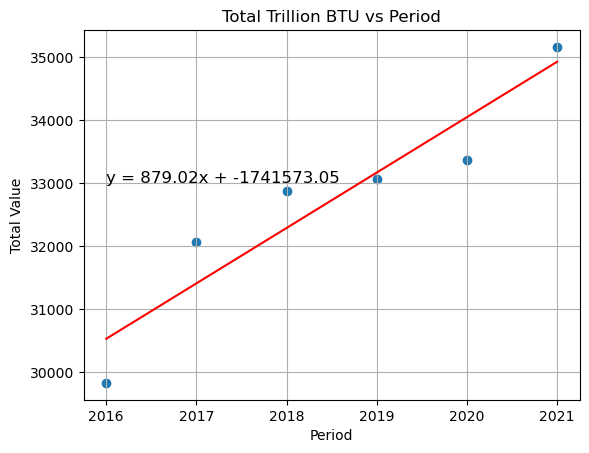

In [38]:
#Create scatter plot with regression line 
units_df = total_energy_df.sort_values(by=['Unit', 'Period'], ascending=True)

# Filter the DataFrame to only include Trillion Btu units and group by period
btu_df = units_df[units_df['Unit'] == 'Trillion Btu'].groupby('Period')['Value'].sum().reset_index()

# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
plt.scatter(x='Period', y='Value', data=btu_df)

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('Total Trillion BTU vs Period')

m, b, r, _, _ = linregress(btu_df['Period'], btu_df['Value'])
plt.plot(btu_df['Period'], m*btu_df['Period'] + b, color='red')
plt.text(2016, 33000, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()


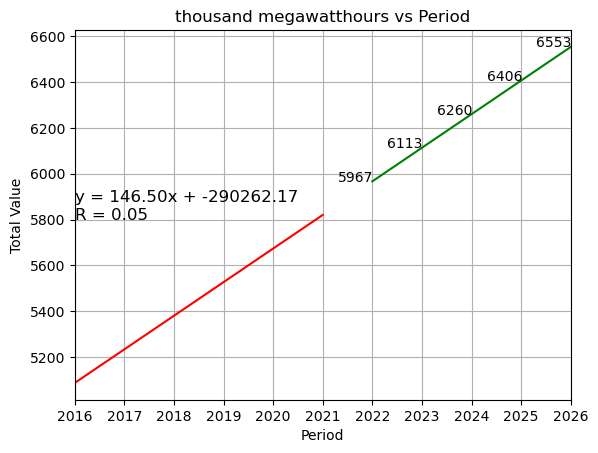

In [68]:
#prediction for total renew energy
# Filter the DataFrame to only include data between 2016 and 2021

total_energy_df = total_energy_df[(total_energy_df['Period'] >= 2016) & (total_energy_df['Period'] <= 2021)]

# Create a scatter plot with Period on the x-axis and Amount Generated on the y-axis
#plt.scatter(x='Period', y='Amount Generated', data=coal_df)

# Set the x-axis limits to only include the period between 2016-2021
plt.xlim(2016, 2026)

# Set the x-axis tick locations and labels

plt.xticks([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026])
plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('thousand megawatthours vs Period')

# Calculate and plot the regression line

m, b, r, _, _ = linregress(total_energy_df['Period'], total_energy_df['Value'])
plt.plot(total_energy_df['Period'], m*total_energy_df['Period'] + b, color='red')

# Display the regression equation and r-value on the plot

plt.text(2016, 5800, f'y = {m:.2f}x + {b:.2f}\nR = {r:.2f}', fontsize=12)

# Make predictions for the next 5 years (2022-2026) using the regression equation

x_pred = np.array([2022, 2023, 2024, 2025, 2026])
y_pred = m*x_pred + b
plt.plot(x_pred, y_pred, color='green')
plt.grid()

for x, y in zip(x_pred, y_pred):
    plt.text(x-.34, y-1, f'{y:.0f}', ha='center')
    
plt.show()

In [9]:
#repeat above for Hydro, Solar, wind

In [10]:
hydro_df = pd.DataFrame(pd.read_csv('CSV/Hydro.csv'))
hydro_df

,Period,Energy Type,Use,Unit
0,2016,conventional hydroelectric,1902.571,thousand megawatthours
1,2017,conventional hydroelectric,1897.228,thousand megawatthours
2,2018,conventional hydroelectric,1825.385,thousand megawatthours
3,2019,conventional hydroelectric,1811.001,thousand megawatthours
4,2020,conventional hydroelectric,1668.561,thousand megawatthours
5,2021,conventional hydroelectric,1598.310,thousand megawatthours


r-value = -0.9561538390465163


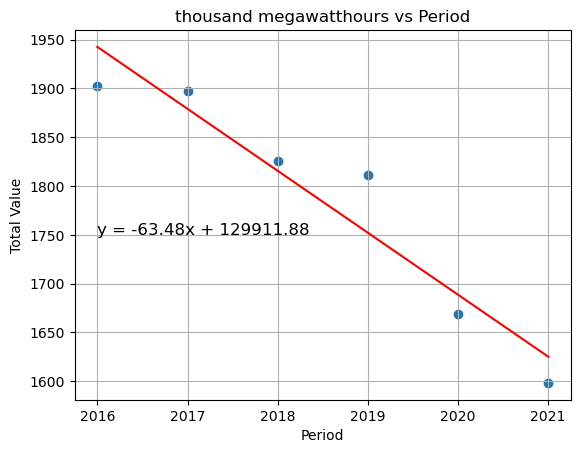

In [37]:
# plot
# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
plt.scatter(x='Period', y='Use', data=hydro_df)

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('thousand megawatthours vs Period')

m, b, r, _, _ = linregress(hydro_df['Period'], hydro_df['Use'])
plt.plot(hydro_df['Period'], m*hydro_df['Period'] + b, color='red')
plt.text(2016, 1750, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()

In [12]:
solar_df = pd.DataFrame(pd.read_csv('CSV/Solar.csv'))
solar_df

,Period,Energy Type,Use,Unit
0,2016,estimated total solar,999.12099,thousand megawatthours
1,2017,estimated total solar,1485.13282,thousand megawatthours
2,2018,estimated total solar,1652.53998,thousand megawatthours
3,2019,estimated total solar,1851.65606,thousand megawatthours
4,2020,estimated total solar,2204.37961,thousand megawatthours
5,2021,estimated total solar,2786.11122,thousand megawatthours


r-value = 0.9802691785794908


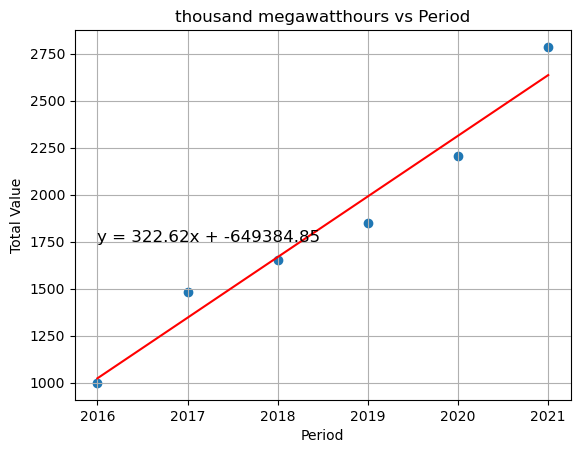

In [36]:
# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
plt.scatter(x='Period', y='Use', data=solar_df)

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('thousand megawatthours vs Period')

m, b, r, _, _ = linregress(solar_df['Period'], solar_df['Use'])
plt.plot(solar_df['Period'], m*solar_df['Period'] + b, color='red')
plt.text(2016, 1750, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()

In [14]:
wind_df = pd.DataFrame(pd.read_csv('CSV/Wind.csv'))
wind_df

,Period,Energy Type,Use,Unit
0,2016,wind,9421.20400,thousand megawatthours
1,2017,wind,9314.66295,thousand megawatthours
2,2018,wind,9745.15000,thousand megawatthours
3,2019,wind,10852.37576,thousand megawatthours
4,2020,wind,13386.22800,thousand megawatthours
5,2021,wind,15125.69700,thousand megawatthours


r-value = 0.9274936502735128


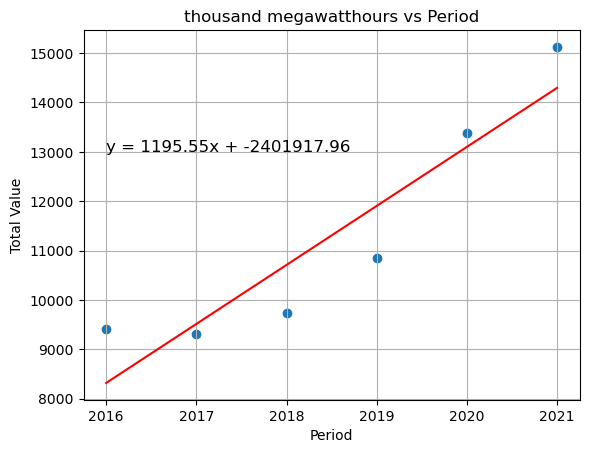

In [35]:
# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
plt.scatter(x='Period', y='Use', data=wind_df)

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('thousand megawatthours vs Period')

m, b, r, _, _ = linregress(wind_df['Period'], wind_df['Use'])
plt.plot(wind_df['Period'], m*wind_df['Period'] + b, color='red')
plt.text(2016, 13000, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()

In [16]:
#line plot showing each three on the same chart

In [17]:
hydro_energy_df = pd.DataFrame(pd.read_csv('CSV/Hydro_energy_generation.csv'))
hydro_energy_df.head()

,Fuel Type,Energy Generation,Energy Units,Location,Period
0,conventional hydroelectric,125.62245,thousand megawatthours,CO,2023-01
1,conventional hydroelectric,103.99342,thousand megawatthours,CO,2022-12
2,conventional hydroelectric,100.08033,thousand megawatthours,CO,2022-11
3,conventional hydroelectric,81.41010,thousand megawatthours,CO,2022-10
4,conventional hydroelectric,98.96762,thousand megawatthours,CO,2022-09


In [18]:
renewable_energy_df = pd.DataFrame(pd.read_csv('CSV/Renewable_energy_generation.csv'))
renewable_energy_df.head()

,Fuel Type,Energy Generation,Energy Units,Location,Period
0,biomass,10.75141,thousand megawatthours,CO,2023-01
1,wood and wood wastes,3.92300,thousand megawatthours,CO,2023-01
2,onshore wind turbine,1283.14071,thousand megawatthours,CO,2023-01
3,wind,1283.14071,thousand megawatthours,CO,2023-01
4,renewable waste products,6.82841,thousand megawatthours,CO,2023-01


In [19]:
renewable_energy_df['Fuel Type'].nunique()

11

In [20]:
#repeat above to compare with Coal & Natural Gas

#Coal

coal_df = pd.DataFrame(pd.read_csv('CSV/Coal_Generated.csv'))
coal_df

,Fuel Type,Amount Generated,Units Measured,Period
0,all coal products,29948.67505,thousand megawatthours,2016
1,all coal products,29242.21643,thousand megawatthours,2017
2,all coal products,26382.06016,thousand megawatthours,2018
3,all coal products,25320.50278,thousand megawatthours,2019
4,all coal products,19478.40504,thousand megawatthours,2020
5,all coal products,23602.04163,thousand megawatthours,2021
6,all coal products,21723.00385,thousand megawatthours,2022


r-value = -0.8608456964580077


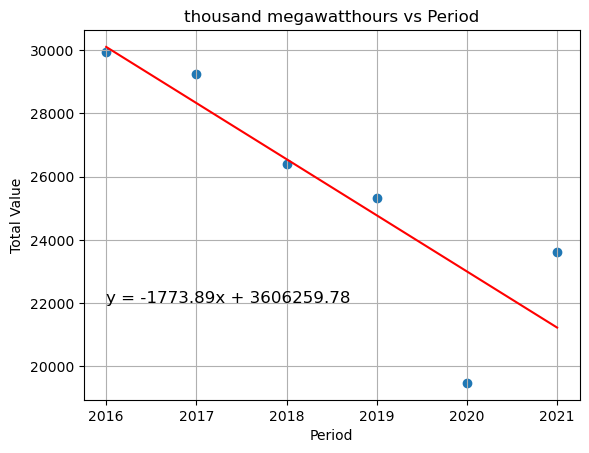

In [34]:
# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
coal_df = coal_df[(coal_df['Period'] >= 2016) & (coal_df['Period'] <= 2021)]

plt.scatter(x='Period', y='Amount Generated', data=coal_df)

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('thousand megawatthours vs Period')

m, b, r, _, _ = linregress(coal_df['Period'], coal_df['Amount Generated'])
plt.plot(coal_df['Period'], m*coal_df['Period'] + b, color='red')
plt.text(2016, 22000, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()

In [22]:
#Natural Gas

nat_gas_df = pd.DataFrame(pd.read_csv('CSV/Nat_Gas_Generated.csv'))
nat_gas_df

,Fuel Type,Amount Generated,Units Measured,Period
0,natural gas,12679.43938,thousand megawatthours,2016
1,natural gas,12532.24249,thousand megawatthours,2017
2,natural gas,16398.43941,thousand megawatthours,2018
3,natural gas,17097.11593,thousand megawatthours,2019
4,natural gas,18171.33776,thousand megawatthours,2020
5,natural gas,14559.77311,thousand megawatthours,2021
6,natural gas,15612.43366,thousand megawatthours,2022


r-value = 0.6131775671573778


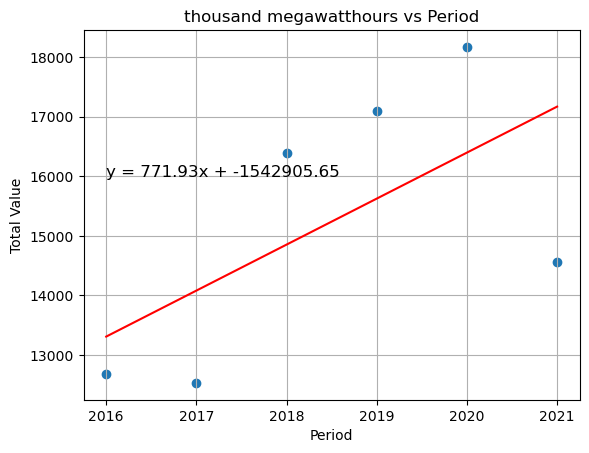

In [33]:
nat_gas_df = nat_gas_df[(nat_gas_df['Period'] >= 2016) & (nat_gas_df['Period'] <= 2021)]

plt.scatter(x='Period', y='Amount Generated', data=nat_gas_df)

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('thousand megawatthours vs Period')

m, b, r, _, _ = linregress(nat_gas_df['Period'], nat_gas_df['Amount Generated'])
plt.plot(nat_gas_df['Period'], m*nat_gas_df['Period'] + b, color='red')
plt.text(2016, 16000, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()